In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

import acorn.core
print(acorn.core.__file__)

import numpy as np
import pandas as pd
import scipy.sparse as sps
import yaml
from itertools import chain, product, combinations
import torch

from time import time as tt
from tqdm import tqdm
import wandb
from acorn.stages.data_reading import AthenaReader
from acorn.core.infer_stage import infer
from acorn.core.eval_stage import evaluate

from acorn.stages.data_reading.models.trackml_utils import *

from acorn.stages.data_reading.data_reading_stage import EventReader
from acorn.stages.data_reading.models.trackml_reader import TrackMLReader

from acorn.stages.graph_construction.models.metric_learning import MetricLearning
from acorn.stages.edge_classifier.models.filter import Filter
from acorn.stages.edge_classifier.models.filter import GNNFilter
from acorn.stages.edge_classifier import InteractionGNN
from acorn.stages.edge_classifier.edge_classifier_stage import EdgeClassifierStage

from acorn.stages.graph_construction.utils import handle_weighting
from acorn.stages.graph_construction.models.utils import graph_intersection, build_edges
from acorn.stages.graph_construction.utils import *
from acorn.stages.graph_construction.models.py_module_map import PyModuleMap
from acorn.stages.graph_construction.graph_construction_stage import GraphConstructionStage

from acorn.stages.track_building import utils 
from torch_geometric.utils import to_scipy_sparse_matrix

#run = wandb.init(project=model_gnn.hparams["project"], entity='gnnproject')

/global/u1/h/hrzhao/Projects/GNN4ITk-aaS/acorn/acorn/core/__init__.py


/global/cfs/cdirs/atlas/hrzhao/Software/miniforge3/envs/acorn/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
from pathlib import Path
models_dir = Path("/global/cfs/cdirs/m3443/data/GNN4ITK/CommonFrameworkExamples/Example_Pipeline_CTD2023/")
model_metriclearning_path = models_dir / "metric_learning" / "best-11292882-f1=0.006355.ckpt"
# model_filter_path = models_dir / "filter" / "best-21725764-auc=0.991198-epoch=42.ckpt"
model_filter_path = "/global/cfs/cdirs/m4439/acorn_model_store/filter/best-23559332-epoch=55-auc=0.991695.ckpt"
model_gnn_path = models_dir / "gnn" / "GNN_IN2_epochs169.ckpt"

Loading checkpoint: /global/cfs/cdirs/m3443/data/GNN4ITK/CommonFrameworkExamples/Example_Pipeline_CTD2023/metric_learning/best-11292882-f1=0.006355.ckpt
Loaded 10 training events, 10 validation events and 10 testing events


/global/u1/h/hrzhao/Projects/GNN4ITk-aaS/acorn/acorn/utils/loading_utils.py:80: UserWarning: OPTIONAL feature [pid] not found in data
  warnings.warn(f"OPTIONAL feature [{feature}] not found in data")
/global/u1/h/hrzhao/Projects/GNN4ITk-aaS/acorn/acorn/utils/loading_utils.py:80: UserWarning: OPTIONAL feature [n_hits] not found in data
  warnings.warn(f"OPTIONAL feature [{feature}] not found in data")
/global/u1/h/hrzhao/Projects/GNN4ITk-aaS/acorn/acorn/utils/loading_utils.py:80: UserWarning: OPTIONAL feature [primary] not found in data
  warnings.warn(f"OPTIONAL feature [{feature}] not found in data")
/global/u1/h/hrzhao/Projects/GNN4ITk-aaS/acorn/acorn/utils/loading_utils.py:80: UserWarning: OPTIONAL feature [pdg_id] not found in data
  warnings.warn(f"OPTIONAL feature [{feature}] not found in data")
/global/u1/h/hrzhao/Projects/GNN4ITk-aaS/acorn/acorn/utils/loading_utils.py:80: UserWarning: OPTIONAL feature [ghost] not found in data
  warnings.warn(f"OPTIONAL feature [{feature}] not

Loaded 10 training events, 10 validation events and 10 testing events
Predicting DataLoader 0:  10%|█         | 1/10 [00:01<00:10,  0.83it/s]

/global/cfs/cdirs/atlas/hrzhao/Software/miniforge3/envs/acorn/lib/python3.10/site-packages/pytorch_lightning/loops/prediction_loop.py:255: predict returned None if it was on purpose, ignore this warning...


Predicting DataLoader 2: 100%|██████████| 10/10 [00:10<00:00,  0.95it/s]
Loading checkpoint: /global/cfs/cdirs/m3443/data/GNN4ITK/CommonFrameworkExamples/Example_Pipeline_CTD2023/metric_learning/best-11292882-f1=0.006355.ckpt
Loaded 1 training events, 10 validation events and 10 testing events


100%|██████████| 10/10 [00:02<00:00,  4.81it/s]


Finish plotting. Find the plot at /pscratch/sd/h/hrzhao/cf/CTD_2023/metric_learning_0508/edgewise_efficiency_pt.png
Finish plotting. Find the plot at /pscratch/sd/h/hrzhao/cf/CTD_2023/metric_learning_0508/edgewise_efficiency_eta.png


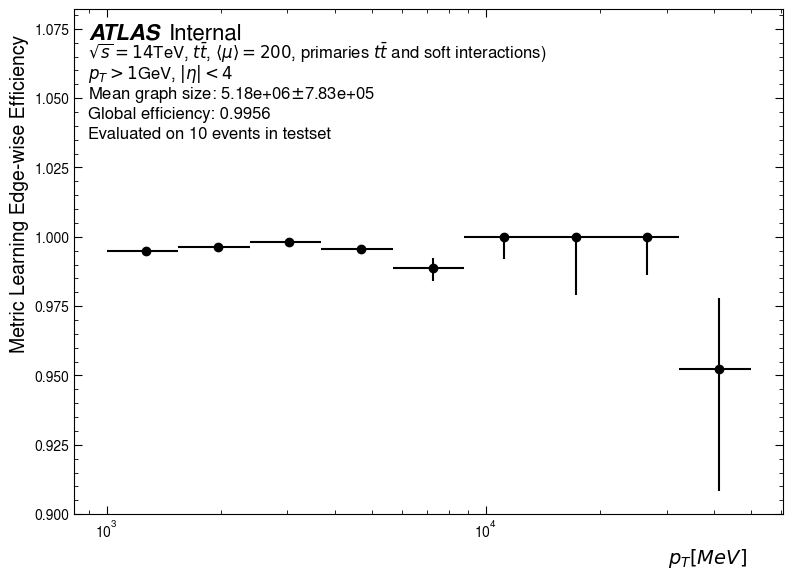

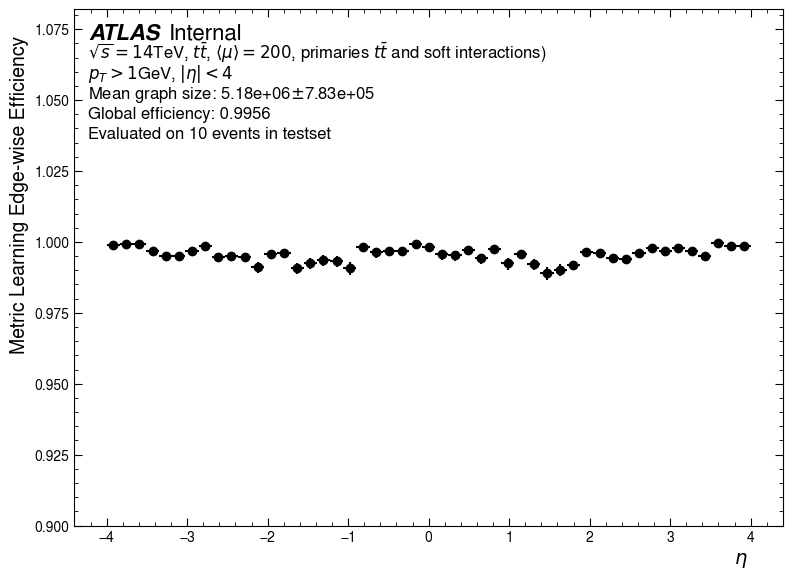

In [9]:
configml = "/global/homes/h/hrzhao/Projects/GNN4ITk-aaS/test-acorn-infer/CTD2023/metric_learning_infer.yaml"
configml_ev = "/global/homes/h/hrzhao/Projects/GNN4ITk-aaS/test-acorn-infer/CTD2023/metric_learning_eval.yaml"
infer(configml, checkpoint=model_metriclearning_path)
evaluate(configml_ev,dataset='testset', checkpoint=model_metriclearning_path)

In [17]:
configfil = "/global/homes/h/hrzhao/Projects/GNN4ITk-aaS/test-acorn-infer/CTD2023/filter_infer.yaml"
configfil_ev = "/global/homes/h/hrzhao/Projects/GNN4ITk-aaS/test-acorn-infer/CTD2023/filter_eval.yaml"
infer(configfil, checkpoint=model_filter_path, verbose=True)
# evaluate(configfil_ev,dataset='testset')

Loading checkpoint: /global/cfs/cdirs/m4439/acorn_model_store/filter/best-23559332-epoch=55-auc=0.991695.ckpt


TypeError: tuple indices must be integers or slices, not tuple

In [ ]:
configGnn = "/global/homes/a/alazar/acorn_yaml/examples/CTD_2023/gnn_infer.yaml"
